# AirBnB Analysis

In [1]:
# Import basic libraries
import numpy as np 
import pandas as pd 

# import visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Airbnb data = https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data?select=AB_NYC_2019.csv

data_location = '../datasets/AB_NYC_2019.csv'
# data_location = 'https://s3.amazonaws.com/elephantscale-public/data/airbnb/AB_NYC_2019.csv'

data = pd.read_csv(data_location)

In [3]:
data.sample(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
34208,27134625,Garden apartment in the heart of Fort Greene,31619241,Caroline,Brooklyn,Fort Greene,40.68925,-73.97108,Entire home/apt,165,2,16,2019-06-20,3.72,1,29
34470,27343189,Jay's Studio Apartment,204036615,Jehan,Bronx,Allerton,40.87015,-73.85582,Entire home/apt,75,4,35,2019-07-01,3.13,1,169
11926,9291870,Cozy Upper East Side 1 Bed,48244550,Janice,Manhattan,Upper East Side,40.76405,-73.95967,Entire home/apt,126,1,3,2016-06-04,0.07,1,0
45191,34593096,"Dapper East Village 1BR w/ Gym, W/D, Doorman, ...",107434423,Blueground,Manhattan,NoHo,40.72517,-73.99274,Entire home/apt,306,30,0,NaN,NaN,232,333
28692,22193183,Bright bedroom with balcony in Williamsburg,23793668,Annalise,Brooklyn,Williamsburg,40.71312,-73.95170,Private room,80,2,4,2019-04-09,0.28,1,0


## Overall stats

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [11]:
data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


## Column specific analysis

In [4]:
# which neighborhood is popular
data['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

## Correlation Matrix

In [9]:
# remove non siginificant numeric columns
data2 = data.drop(['id', 'host_id', 'latitude', 'longitude'], axis=1)
data2.corr()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.042799,-0.047954,-0.030608,0.057472,0.081829
minimum_nights,0.042799,1.000000,-0.080116,-0.121702,0.127960,0.144303
number_of_reviews,-0.047954,-0.080116,1.000000,0.549868,-0.072376,0.172028
reviews_per_month,-0.030608,-0.121702,0.549868,1.000000,-0.009421,0.185791
calculated_host_listings_count,0.057472,0.127960,-0.072376,-0.009421,1.000000,0.225701
availability_365,0.081829,0.144303,0.172028,0.185791,0.225701,1.000000


<AxesSubplot:>

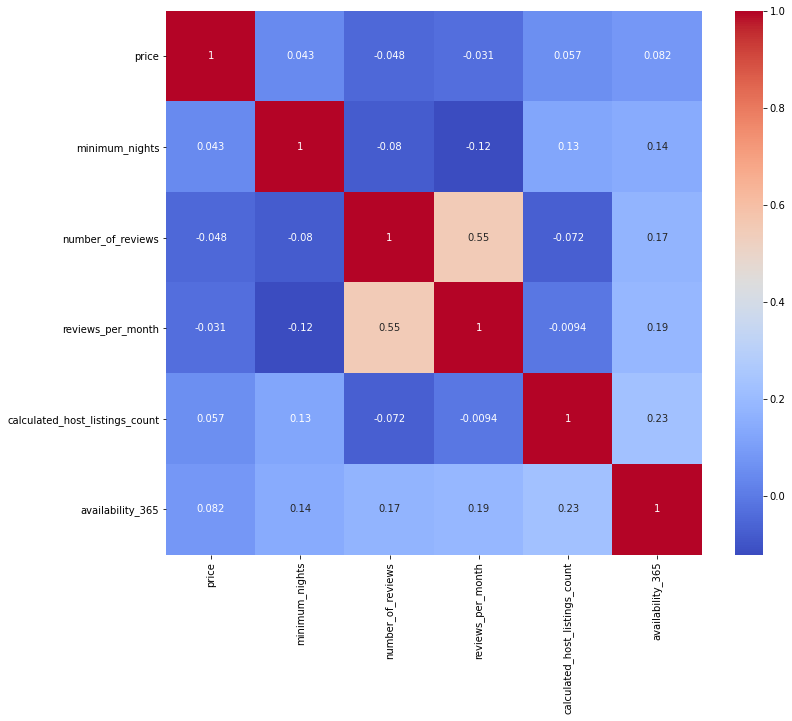

In [10]:
f, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(data2.corr(),   vmax=1, # xticklabels=corr.columns,  yticklabels=corr.columns,
            cmap='coolwarm', annot=True, annot_kws={'size': 10})
# cmap = RdBu,  coolwarm, coolwarm_r , rocket, rocket_r, flare, flare_r
# play with color palettes here : https://seaborn.pydata.org/tutorial/color_palettes.html